<a href="https://colab.research.google.com/github/amandaswens/DSPS_ASwenson/blob/main/HW2/Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [1]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
...

Ellipsis

## Task #1: Generating four distributions

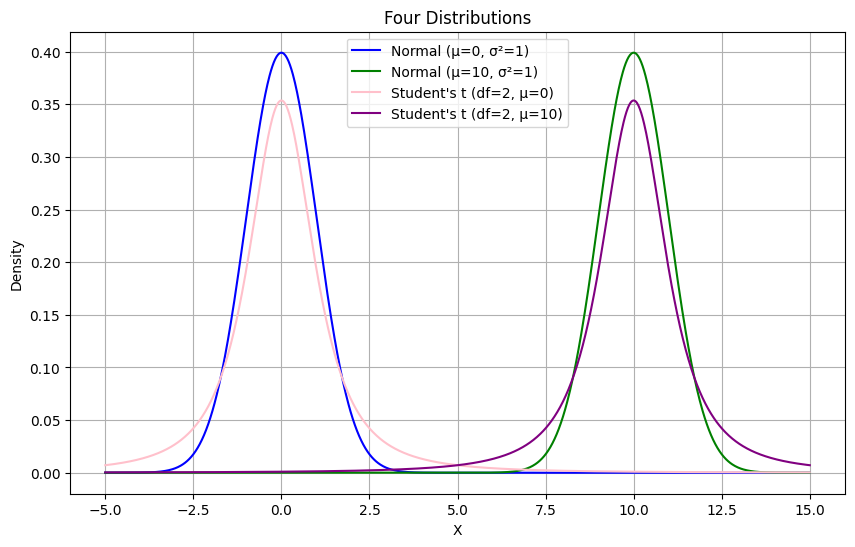

In [3]:
x = np.linspace(-5,15,1000)
Norm_0 = norm.pdf(x, loc=0, scale=1)
Norm_10 = norm.pdf(x, loc =10, scale=1)
tStudent_0 = t.pdf(x, df=2, loc=0, scale=1)
tStudent_10 = t.pdf(x, df=2, loc=10, scale=1)

plt.figure(figsize=(10, 6))
plt.plot(x, Norm_0, label='Normal (μ=0, σ²=1)', color='blue')
plt.plot(x, Norm_10, label='Normal (μ=10, σ²=1)', color='green')
plt.plot(x, tStudent_0, label="Student's t (df=2, μ=0)", color='pink')
plt.plot(x, tStudent_10, label="Student's t (df=2, μ=10)", color='purple')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Four Distributions')
plt.legend()
plt.grid(True)
plt.show()


## Task #2: Making function to compute and plot posterior distribution

In [5]:
def posterior(prior, likelihood, title, caption):
  normalized_prior = prior / np.max(prior)
  normalized_likelihood = likelihood / np.max(likelihood)

  posterior = normalized_prior * normalized_likelihood
  posterior = posterior / np.max(posterior)

  plt.figure(figsize=(8, 5))
  plt.plot(x, normalized_prior, 'k--', label='Prior')
  plt.plot(x, normalized_likelihood, 'k-', label='Likelihood')
  plt.plot(x, posterior, 'r-', label='Posterior')
  plt.xlabel('X')
  plt.ylabel('Normalized Density')
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

  print(caption)

## Task #3: Computing and plotting for each combination

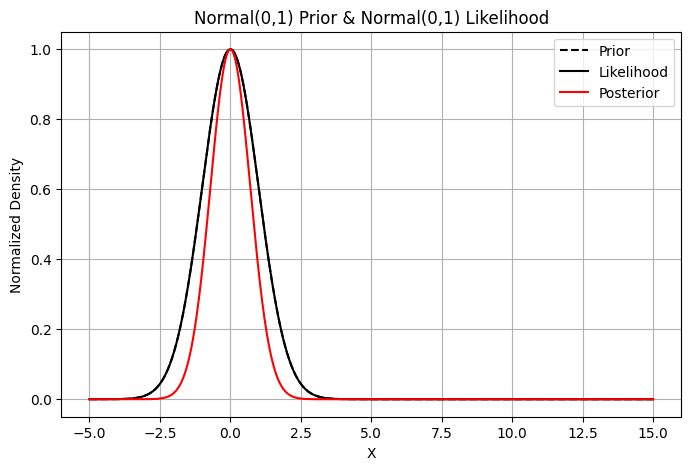


          - What: This plot shows the posterior distribution resulting from a Normal(0,1) prior and a Normal(0,1) likelihood.
          - Why: Combining two normal distributions as prior and likelihood often results in a posterior that is also normal, due to the conjugate properties of the normal distribution. The normalization ensure clear visualization of the shapes. 
          


In [9]:
#function call
posterior(Norm_0, Norm_0, 'Normal(0,1) Prior & Normal(0,1) Likelihood',
          """
          - What: This plot shows the posterior distribution resulting from a Normal(0,1) prior and a Normal(0,1) likelihood.
          - Why: Combining two normal distributions as prior and likelihood often results in a posterior that is also normal, due to the conjugate properties of the normal distribution. The normalization ensure clear visualization of the shapes.
          """)

In [ ]:
......